In this file, the road shapefile and the points shapefile are analyzed. In the intersections_roads_bonus_assignment2.ipynb is analyzed that only these two shapefiles are usefull. 

The end result is an overview (plot) of the relevant/'big' intersections (intersections of primary roads) on the road system in Bangladash.

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
import fiona
from shapely.geometry import Point, mapping
from fiona import collection
from fiona.crs import from_epsg

In [2]:
df_roads = gpd.read_file('roads.shp')
df_roads

,osm_id,name,ref,type,oneway,bridge,maxspeed,geometry
0,8656088,Park Rd,None,residential,0,0,NaN,"LINESTRING (90.42258 23.79758, 90.42238 23.798..."
1,8656089,Embassy Rd,None,residential,0,0,NaN,"LINESTRING (90.41891 23.79768, 90.42034 23.798..."
2,8656151,Dutabash Rd,None,residential,0,0,NaN,"LINESTRING (90.41857 23.79918, 90.41941 23.799..."
3,8656152,Road 1,None,residential,0,0,NaN,"LINESTRING (90.41926 23.80001, 90.42059 23.800..."
4,8656154,Road 2,None,residential,0,0,NaN,"LINESTRING (90.42049 23.80098, 90.42088 23.801..."
...,...,...,...,...,...,...,...,...
112709,447973736,None,None,pedestrian,0,0,NaN,"LINESTRING (89.23653 25.76315, 89.23796 25.763..."
112710,448000708,None,None,residential,0,0,NaN,"LINESTRING (92.16661 22.66153, 92.16673 22.662..."
112711,448022611,None,None,residential,0,0,NaN,"LINESTRING (90.36810 23.80867, 90.36771 23.808..."
112712,448025458,None,None,residential,0,0,NaN,"LINESTRING (90.37306 23.78523, 90.37371 23.78539)"


In [3]:
df_roads['type'].unique()

array(['residential', 'trunk', 'primary', 'unclassified', 'service',
       'secondary', 'tertiary', 'track', 'primary_link', 'motorway',
       'footway', 'living_street', 'pedestrian', 'road', 'tertiary_link',
       'path', 'motorway_link', 'trunk_link', 'steps', 'secondary_link',
       'raceway', 'construction', 'bridleway', 'platform', 'cycleway',
       'rest_area', 'yes', 'minor', 'services', 'Lane', 'Embankment',
       'corridor', 'embankment'], dtype=object)

<AxesSubplot:>

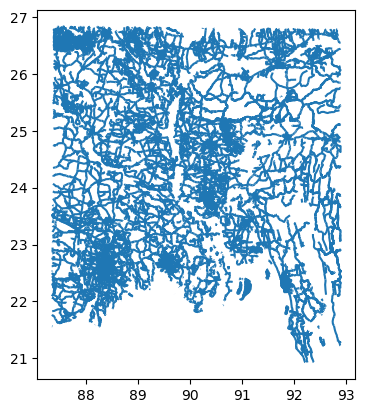

In [4]:
df_roads.plot()

Below we try to identify the intersection points, without using a build in geopandas / shapley intersection function.

In [5]:
new_df_roads = df_roads[['geometry']].copy()
new_df_roads

,geometry
0,"LINESTRING (90.42258 23.79758, 90.42238 23.798..."
1,"LINESTRING (90.41891 23.79768, 90.42034 23.798..."
2,"LINESTRING (90.41857 23.79918, 90.41941 23.799..."
3,"LINESTRING (90.41926 23.80001, 90.42059 23.800..."
4,"LINESTRING (90.42049 23.80098, 90.42088 23.801..."
...,...
112709,"LINESTRING (89.23653 25.76315, 89.23796 25.763..."
112710,"LINESTRING (92.16661 22.66153, 92.16673 22.662..."
112711,"LINESTRING (90.36810 23.80867, 90.36771 23.808..."
112712,"LINESTRING (90.37306 23.78523, 90.37371 23.78539)"


In [6]:
only_duplicates_roads_df = new_df_roads[new_df_roads.duplicated(keep=False)]
only_duplicates_roads_df

,geometry
27521,"LINESTRING (88.42259 22.60206, 88.42252 22.60173)"
49825,"LINESTRING (88.42259 22.60206, 88.42252 22.60173)"
71992,"LINESTRING (88.64631 24.36579, 88.64645 24.36574)"
71993,"LINESTRING (88.64381 24.36700, 88.64426 24.36684)"
72059,"LINESTRING (88.64631 24.36579, 88.64645 24.36574)"
72061,"LINESTRING (88.64381 24.36700, 88.64426 24.36684)"
111066,"LINESTRING (89.69920 23.21174, 89.69925 23.21146)"
111067,"LINESTRING (89.69920 23.21174, 89.69925 23.21146)"
112160,"LINESTRING (89.64509 23.04083, 89.64608 23.040..."
112163,"LINESTRING (89.64509 23.04083, 89.64608 23.040..."


<AxesSubplot:>

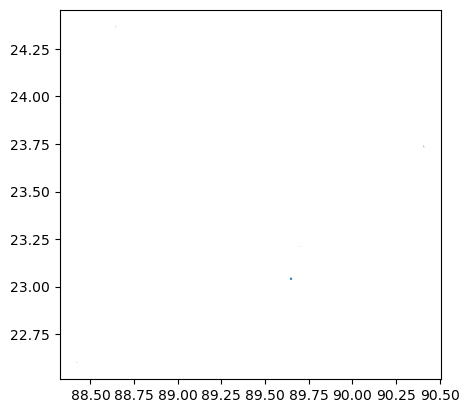

In [7]:
only_duplicates_roads_df.plot()

Above was tried to identfy the intersections without using the Geopandas en shaply intersection function. This was not succesfull. Below, we try it another way.

In [8]:
df_relevant_roads = df_roads[(df_roads['type']=='primary') | (df_roads['type']=='primary_link') | (df_roads['type']=='road')]
df_relevant_roads

,osm_id,name,ref,type,oneway,bridge,maxspeed,geometry
21,10101959,Ashulia Highway,N 302,primary,0,0,NaN,"LINESTRING (90.26974 23.93805, 90.27077 23.937..."
22,10101968,Dhaka - Mymensingh Road,None,primary,1,0,NaN,"LINESTRING (90.40117 23.88047, 90.40102 23.880..."
23,10101976,Dhaka - Mymensingh Road,None,primary,1,0,NaN,"LINESTRING (90.40064 23.87457, 90.40066 23.874..."
100,13641478,Bir Uttam Rafiqul Islam Ave,None,primary,1,0,60.0,"LINESTRING (90.42357 23.79780, 90.42359 23.797..."
101,13844837,D. I. T. Road,None,primary,1,0,60.0,"LINESTRING (90.42569 23.78060, 90.42567 23.780..."
...,...,...,...,...,...,...,...,...
112323,444888104,None,None,primary,1,0,NaN,"LINESTRING (90.37816 23.75124, 90.37826 23.751..."
112485,445306865,None,None,primary,0,0,NaN,"LINESTRING (90.17516 22.18230, 90.17512 22.182..."
112503,445433416,Eastern Metropolitan Bypass,None,primary,1,0,NaN,"LINESTRING (88.40189 22.51358, 88.40191 22.51353)"
112594,447044477,None,None,road,0,0,NaN,"LINESTRING (90.37270 23.76075, 90.37970 23.761..."


In [9]:
geo_relevant_roads = df_relevant_roads[['geometry']].copy()
geo_relevant_roads

,geometry
21,"LINESTRING (90.26974 23.93805, 90.27077 23.937..."
22,"LINESTRING (90.40117 23.88047, 90.40102 23.880..."
23,"LINESTRING (90.40064 23.87457, 90.40066 23.874..."
100,"LINESTRING (90.42357 23.79780, 90.42359 23.797..."
101,"LINESTRING (90.42569 23.78060, 90.42567 23.780..."
...,...
112323,"LINESTRING (90.37816 23.75124, 90.37826 23.751..."
112485,"LINESTRING (90.17516 22.18230, 90.17512 22.182..."
112503,"LINESTRING (88.40189 22.51358, 88.40191 22.51353)"
112594,"LINESTRING (90.37270 23.76075, 90.37970 23.761..."


In [10]:
df_points = gpd.read_file('points.shp')
df_points

,osm_id,timestamp,name,type,geometry
0,60916927,None,Malibagh Circle,traffic_signals,POINT (90.41429 23.74404)
1,61742168,None,None,mini_roundabout,POINT (90.41976 23.79658)
2,85577114,None,None,traffic_signals,POINT (90.42357 23.79780)
3,98767208,None,None,traffic_signals,POINT (90.41426 23.79489)
4,98767293,None,None,traffic_signals,POINT (90.40105 23.79450)
...,...,...,...,...,...
11926,155332310,None,Duch-Bangla ATM,atm,POINT (89.24439 25.75492)
11927,155368499,None,None,bus_stop,POINT (88.71627 22.20472)
11928,155558694,None,None,fast_food,POINT (90.39408 23.72879)
11929,155695594,None,None,post_office,POINT (90.38091 22.46373)


In [11]:
df_points['type'].unique()

array(['traffic_signals', 'mini_roundabout', 'motorway_junctio',
       'level_crossing', 'university', 'monument', 'station', 'bus_stop',
       'pub', 'hospital', 'school', 'fuel', 'bus_station',
       'place_of_worship', 'cinema', 'zoo', 'crossing', 'public_building',
       'atm', 'nightclub', 'police', 'college', 'hotel', 'restaurant',
       'bank', 'buffer_stop', 'rail', 'ferry_terminal', 'switch',
       'rest_area', 'library', 'turning_circle', 'embassy', 'bench',
       'viewpoint', 'attraction', 'fast_food', 'castle', 'tower',
       'camp_site', 'drinking_water', 'hostel', 'fire_station',
       'guest_house', 'park', 'adminstration', 'post_box',
       'Ministry of Plan', 'post_office', 'pharmacy', 'taxi', 'halt',
       'parking', 'services', 'theatre', 'cafe', 'doctors', 'car_sharing',
       'memorial', 'marketplace', 'money_transfer', 'gymnasium', 'museum',
       'waste_basket', 'Market', 'tram_stop', 'telephone', 'academic',
       'medical', 'shelter', 'service', '

Below, we only include the necessary types. These are the ones that are 'intersection'-related and therefore relevant.

In [12]:
df_relevant_points = df_points[(df_points['type']=='level_crossing') | (df_points['type']=='switch') | (df_points['type']=='motorway_junctio') | (df_points['type']=='crossing')]
df_relevant_points

,osm_id,timestamp,name,type,geometry
5,98767720,None,None,motorway_junctio,POINT (90.41494 23.81879)
6,123035061,None,None,level_crossing,POINT (90.42710 23.72505)
36,264892250,None,Chankhar pool Crossing,crossing,POINT (90.40029 23.72387)
50,267094076,None,মালিবাগ রেল গেট,level_crossing,POINT (90.41272 23.74965)
77,310992925,None,None,level_crossing,POINT (88.32443 22.77927)
...,...,...,...,...,...
11019,74952460,None,Humayun Shaheb Railgate,level_crossing,POINT (90.42664 23.71783)
11114,85435622,None,None,crossing,POINT (91.99880 21.44433)
11201,89938571,None,None,level_crossing,POINT (89.23913 24.00150)
11639,129299242,None,None,level_crossing,POINT (89.86693 24.46094)


<AxesSubplot:>

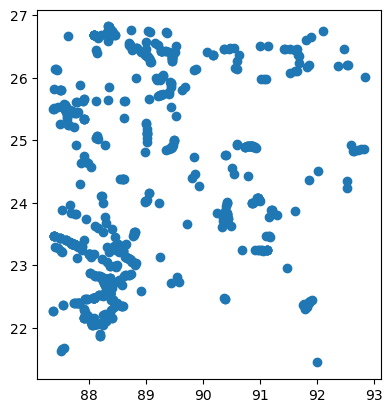

In [13]:
df_relevant_points.plot()

In [14]:
df_point_geometry_only = df_relevant_points['geometry'].copy()

In [15]:
df_point_geometry_only.geometry

5        POINT (90.41494 23.81879)
6        POINT (90.42710 23.72505)
36       POINT (90.40029 23.72387)
50       POINT (90.41272 23.74965)
77       POINT (88.32443 22.77927)
                   ...            
11019    POINT (90.42664 23.71783)
11114    POINT (91.99880 21.44433)
11201    POINT (89.23913 24.00150)
11639    POINT (89.86693 24.46094)
11841    POINT (90.38229 23.71211)
Name: geometry, Length: 722, dtype: geometry

Below it is visible that the 'standard' intersection function does not work well, due to different formatting of new_df_roads and df_point_geometry_only.

In [16]:
new_df_roads.intersection(df_point_geometry_only)


C:\Users\thoma\Anaconda3\envs\gds\lib\site-packages\geopandas\base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


0         None
1         None
2         None
3         None
4         None
          ... 
112709    None
112710    None
112711    None
112712    None
112713    None
Length: 112714, dtype: geometry

Now we try a different function.

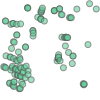

In [17]:
points = geo_relevant_roads.unary_union.intersection(df_point_geometry_only.unary_union)
points

In [18]:
# Based on: https://gis.stackexchange.com/questions/252474/intersecting-lines-to-get-points-in-geopandas.

schema = { 'geometry': 'Point', 'properties': { } }
with collection(
    r"IntersectPoints.shp", "w", "ESRI Shapefile", 
    schema, crs=from_epsg(26912)) as output:
    for i in points.geoms:
        output.write({'properties': {}, 
                      'geometry': mapping(Point(i.x, i.y))})

<AxesSubplot:>

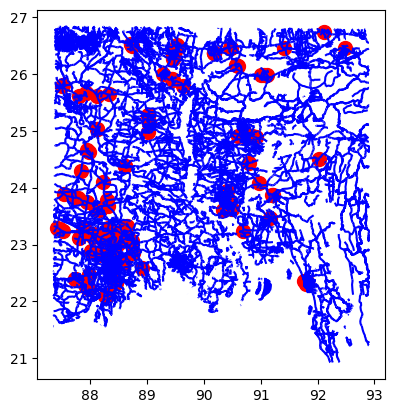

In [19]:
fig, ax = plt.subplots()

df_roads.plot(ax=ax, color='blue')

points_df = gpd.read_file(r"IntersectPoints.shp")
points_df.plot(ax=ax, markersize=100, color='red')

This is the overview of the relevant intersections in the road network of Bangladesh.